In [29]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
news_paper_data = pd.read_csv('NewspaperData.csv')

In [3]:
news_paper_data

,Newspaper,daily,sunday
0,Baltimore Sun,391.952,488.506
1,Boston Globe,516.981,798.298
2,Boston Herald,355.628,235.084
3,Charlotte Observer,238.555,299.451
4,Chicago Sun Times,537.780,559.093
5,Chicago Tribune,733.775,1133.249
6,Cincinnati Enquirer,198.832,348.744
7,Denver Post,252.624,417.779
8,Des Moines Register,206.204,344.522
9,Hartford Courant,231.177,323.084


# Data Understanding

## Initial Analysis

In [19]:
news_paper_data.shape

(34, 3)

In [20]:
news_paper_data.isna().sum()

Newspaper    0
daily        0
sunday       0
dtype: int64

In [5]:
news_paper_data.dtypes

Newspaper     object
daily        float64
sunday       float64
dtype: object

## Assumptions Check

## Normality Test

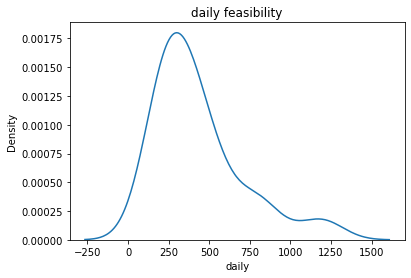

In [24]:
sns.distplot(a = news_paper_data['daily'],hist=False)
plt.title('daily feasibility')
plt.show()

In [25]:
news_paper_data.skew()

daily     1.532159
sunday    1.564473
dtype: float64

In [26]:
news_paper_data.kurtosis()

daily     1.999034
sunday    2.209438
dtype: float64

# Normality test failed

## 2.linearity Test

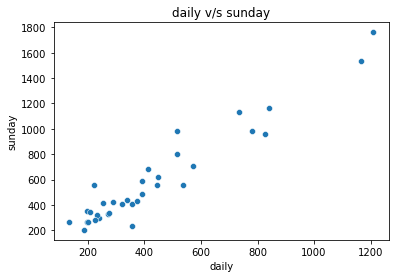

In [31]:
sns.scatterplot(x= "daily",y='sunday',data=news_paper_data)
plt.title('daily v/s sunday')
plt.show()


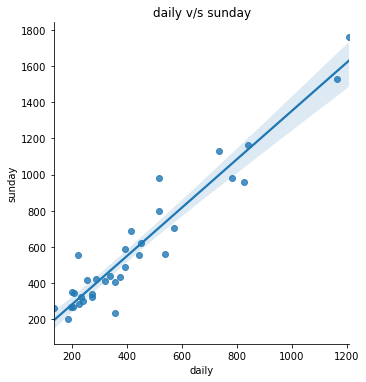

In [32]:
sns.lmplot(x = "daily",y ='sunday',data=news_paper_data)
plt.title('daily v/s sunday')
plt.show()

#### Linearity test also failed

# Multicollinearity


we cannot perform here as we are havingonly one input

# AutoRegression Test



we cannot perform here as we are havingonly one input feature and that is also not time  based feature

### Homoscedasticity  Test || Zero Resudial Mean Test


these two tests can be performed post model training

# Data Preperation

In [33]:
del news_paper_data['Newspaper']

In [34]:
news_paper_data.head()

,daily,sunday
0,391.952,488.506
1,516.981,798.298
2,355.628,235.084
3,238.555,299.451
4,537.780,559.093


In [36]:
news_paper_data.isna().sum()

daily     0
sunday    0
dtype: int64

In [37]:
news_paper_data.dtypes

daily     float64
sunday    float64
dtype: object

### Notes:

linear Regression can be performed using 2 libraries:

1. Statsmodels -OLS[ordinary Least Square]

2. Sklearn - LinearRegression()



# Model Building || Model Training using statsmodels 

In [39]:
import statsmodels.formula.api as smf

In [43]:
linear_model = smf.ols(formula='sunday~daily',data=news_paper_data).fit()
linear_model

In [44]:
linear_model.params

Intercept    13.835630
daily         1.339715
dtype: float64

## Model Testing

### Manual Testing

y = mx+c


if  x=200, y=?


if x=350,y = ?


In [46]:
(1.339715*200)+13.835630

281.77862999999996

In [47]:
(1.339715*350)+13.835630

482.73587999999995

## Machine Prediction

In [49]:
test_data = pd.DataFrame(data={'daily':[200,350]})

In [50]:
linear_model.predict(test_data)

0    281.778581
1    482.735795
dtype: float64

# 8. model evaluation

# Model deployment

In [52]:
from pickle import dump

In [53]:
dump(linear_model,open('model.pkl','wb'))

In [54]:
from pickle import load

In [56]:
loaded_model = load(open('model.pkl','rb'))

In [57]:
loaded_model.predict(test_data)

0    281.778581
1    482.735795
dtype: float64